## CALIFORNIA HOUSING PRICING



#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the House Value (median value) in California is affected by other variables such as Longitude, Latitude, Median Age of the House, Total Rooms, Total Bedrooms, Population, Households, Median Income and Ocean Proximity.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/camnugent/california-housing-prices
- The data consists of 10 column and 20,640 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('housing.csv')

#### Show Top 5 Records

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


#### Shape of the dataset

In [4]:
df.shape

(20640, 10)

### 2.2 Dataset information

- longitude: longitudunal position on the earth surface
- latitude: latitudunal position on the earth surface
- housing_median_age: median age of the house
- total_rooms: total number of rooms
- total_bedrooms: total number of bedrooms
- population: observed population
- households: total number of households
- median_income: median income
- median_house_value: median value of the house
- ocean_proximity: proximity to the ocean

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### There are some missing values found in total_bedrooms column of the data set, therfore we recruit the services of simple imputer from sci-kit learn library

In [8]:
imputer = SimpleImputer(strategy='median')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

In [9]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### There are no missing values after Imputation

### 3.2 Check Duplicates

In [12]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [13]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### 3.4 Checking the number of unique values of each column

In [14]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

### 3.5 Check statistics of data set

In [15]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### The minus sign in the longitude column signifies that all the location California is west of the Prime Meridian, so for regression purpose we shall eliminate the minus sign

In [17]:
df['longitude'] = df['longitude'].abs()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [18]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,114.310000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,118.010000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,121.800000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,124.350000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Insight
From above description of numerical data 
- The min mean value stands at 3.8 while the max mean value stands at 206855.8
- Standard deviations ranges between 1.8 and 115395.6

### 3.7 Exploring Data

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [20]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

We have 1 categorical features : ['ocean_proximity']


In [22]:
print("Categories in 'ocean_proximity' variable: ",end=" " )
print(df['ocean_proximity'].unique())

Categories in 'ocean_proximity' variable:  ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


### 4. Exploring Data ( Visualization )
#### 4.1 Univariate Analysis of Numerical Variables

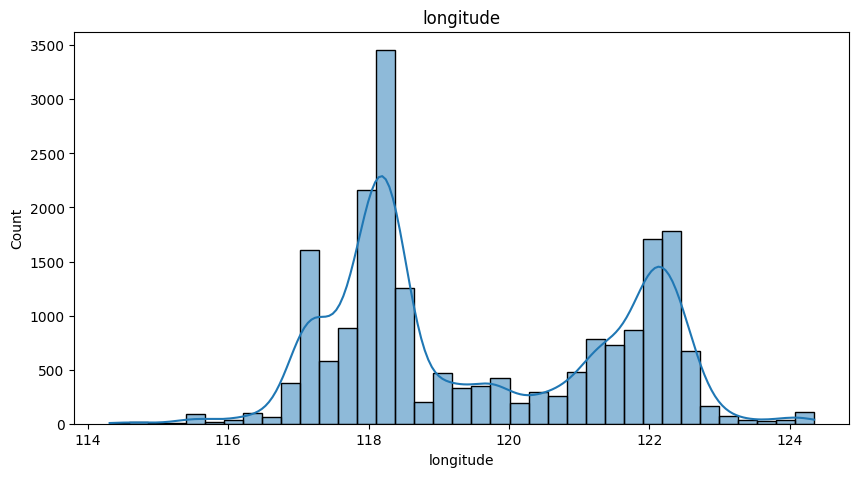

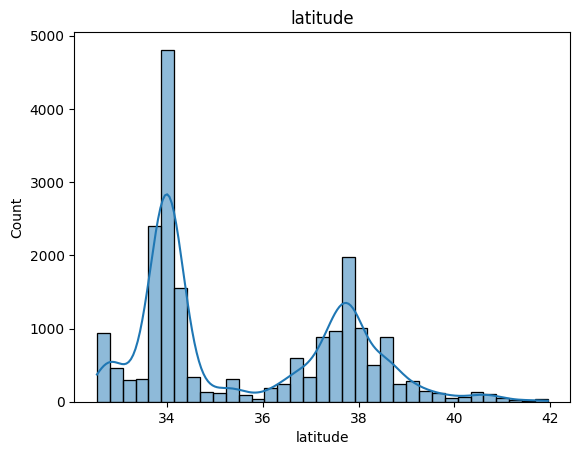

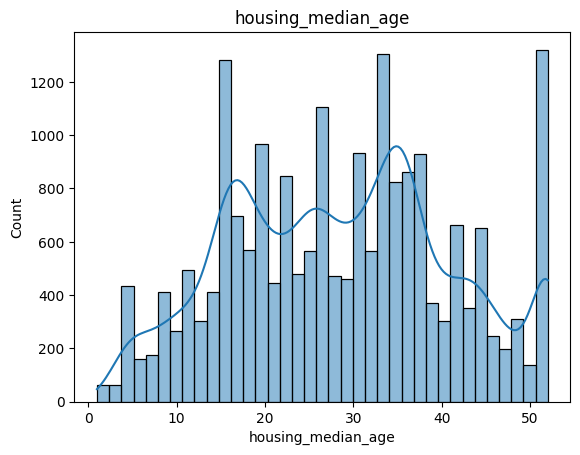

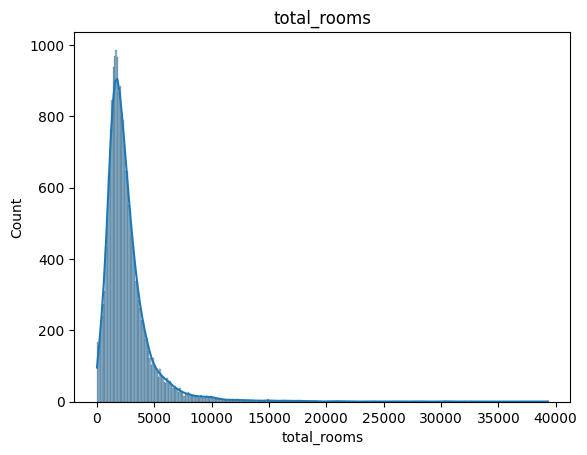

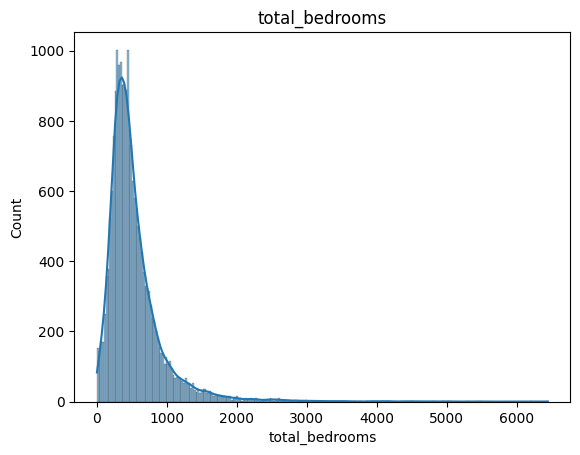

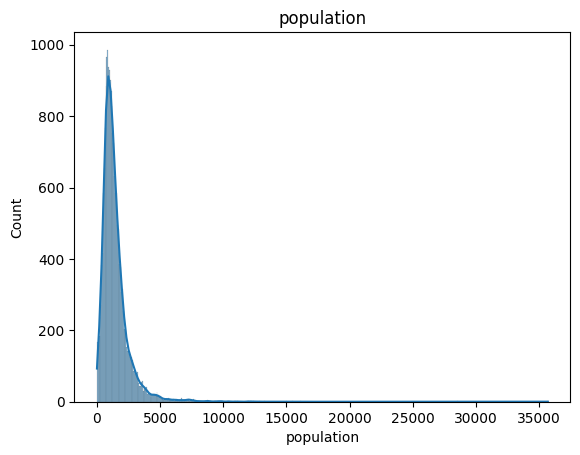

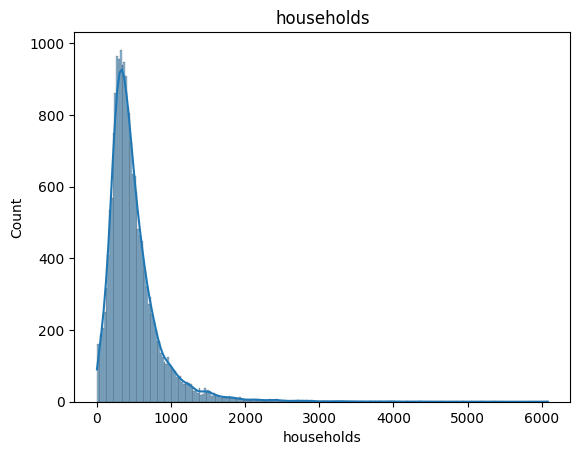

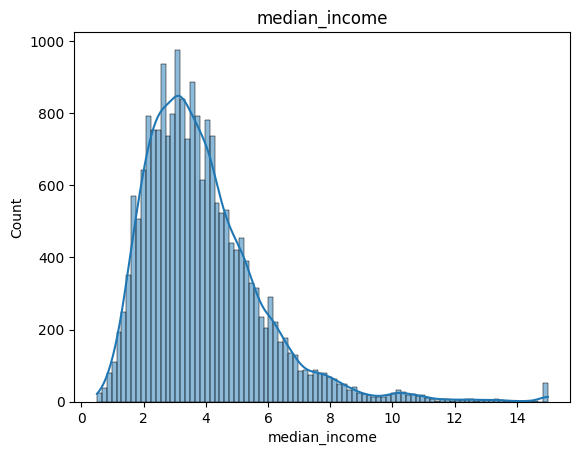

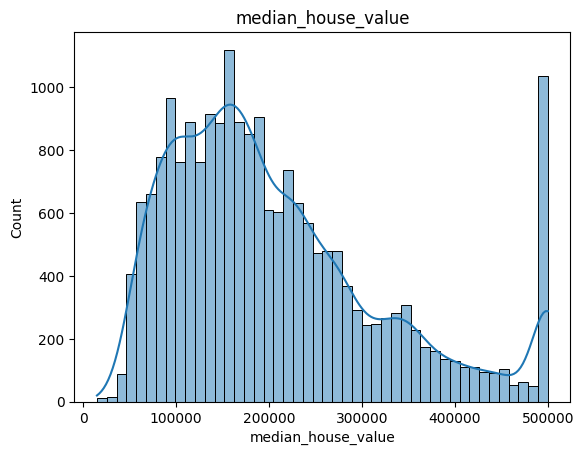

In [29]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numeric_features:
    sns.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

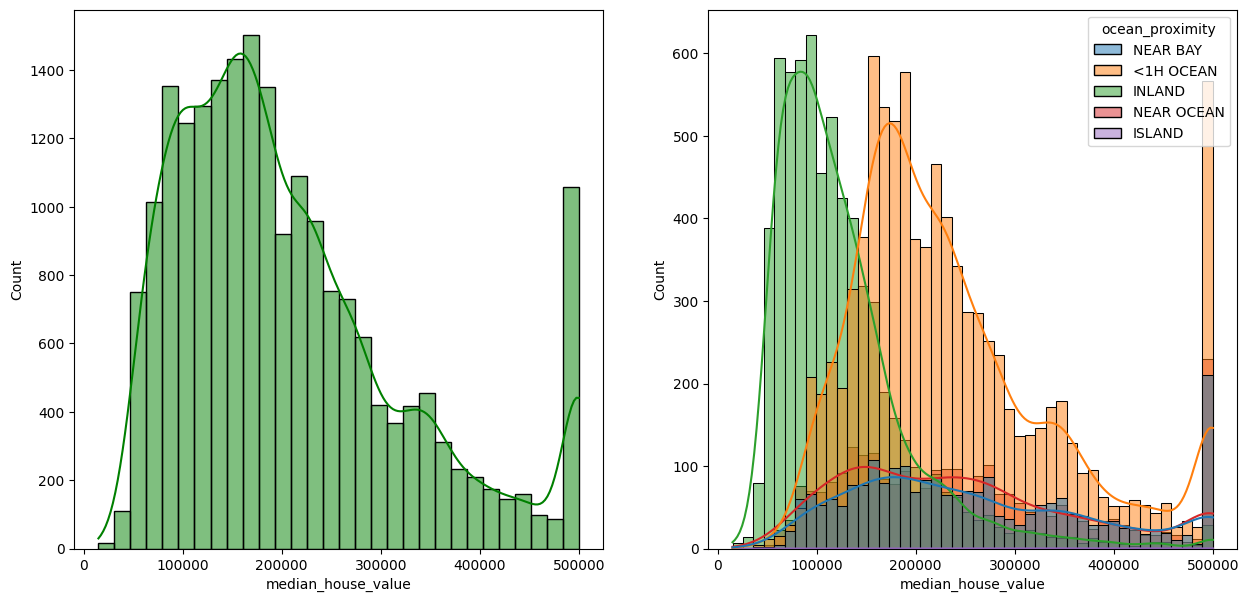

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='median_house_value',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='median_house_value',kde=True,hue='ocean_proximity')
plt.show()

##### Insight: Houses closer less than 1 hour proximity to the ocean tend to have higher median value

#### 4.2 Univariate Analysis of Categorical Variables

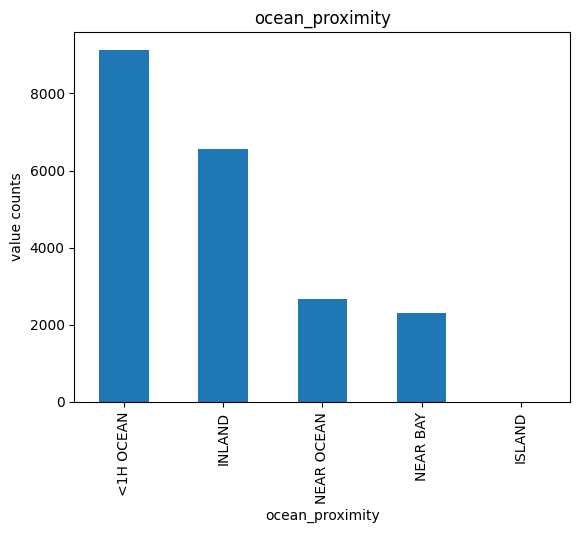

In [31]:
for i in categorical_features:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

#### There are more house less than 1 hour to the ocean observed

#### 4.3 Correlation Heatmap

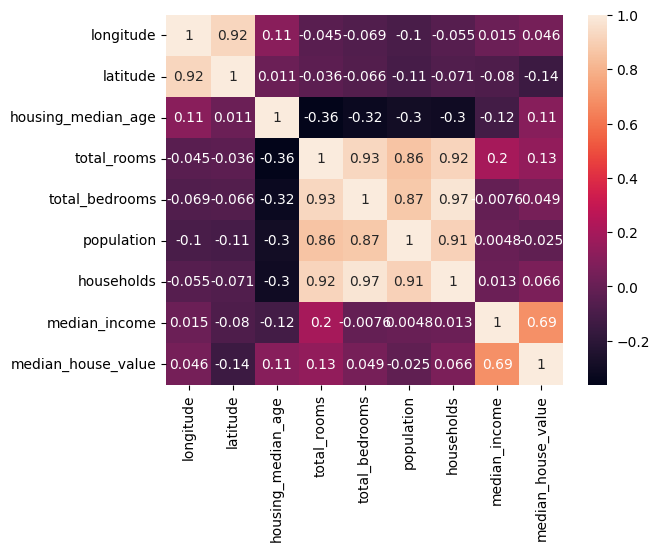

In [33]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

#####  4.4 Pairplot

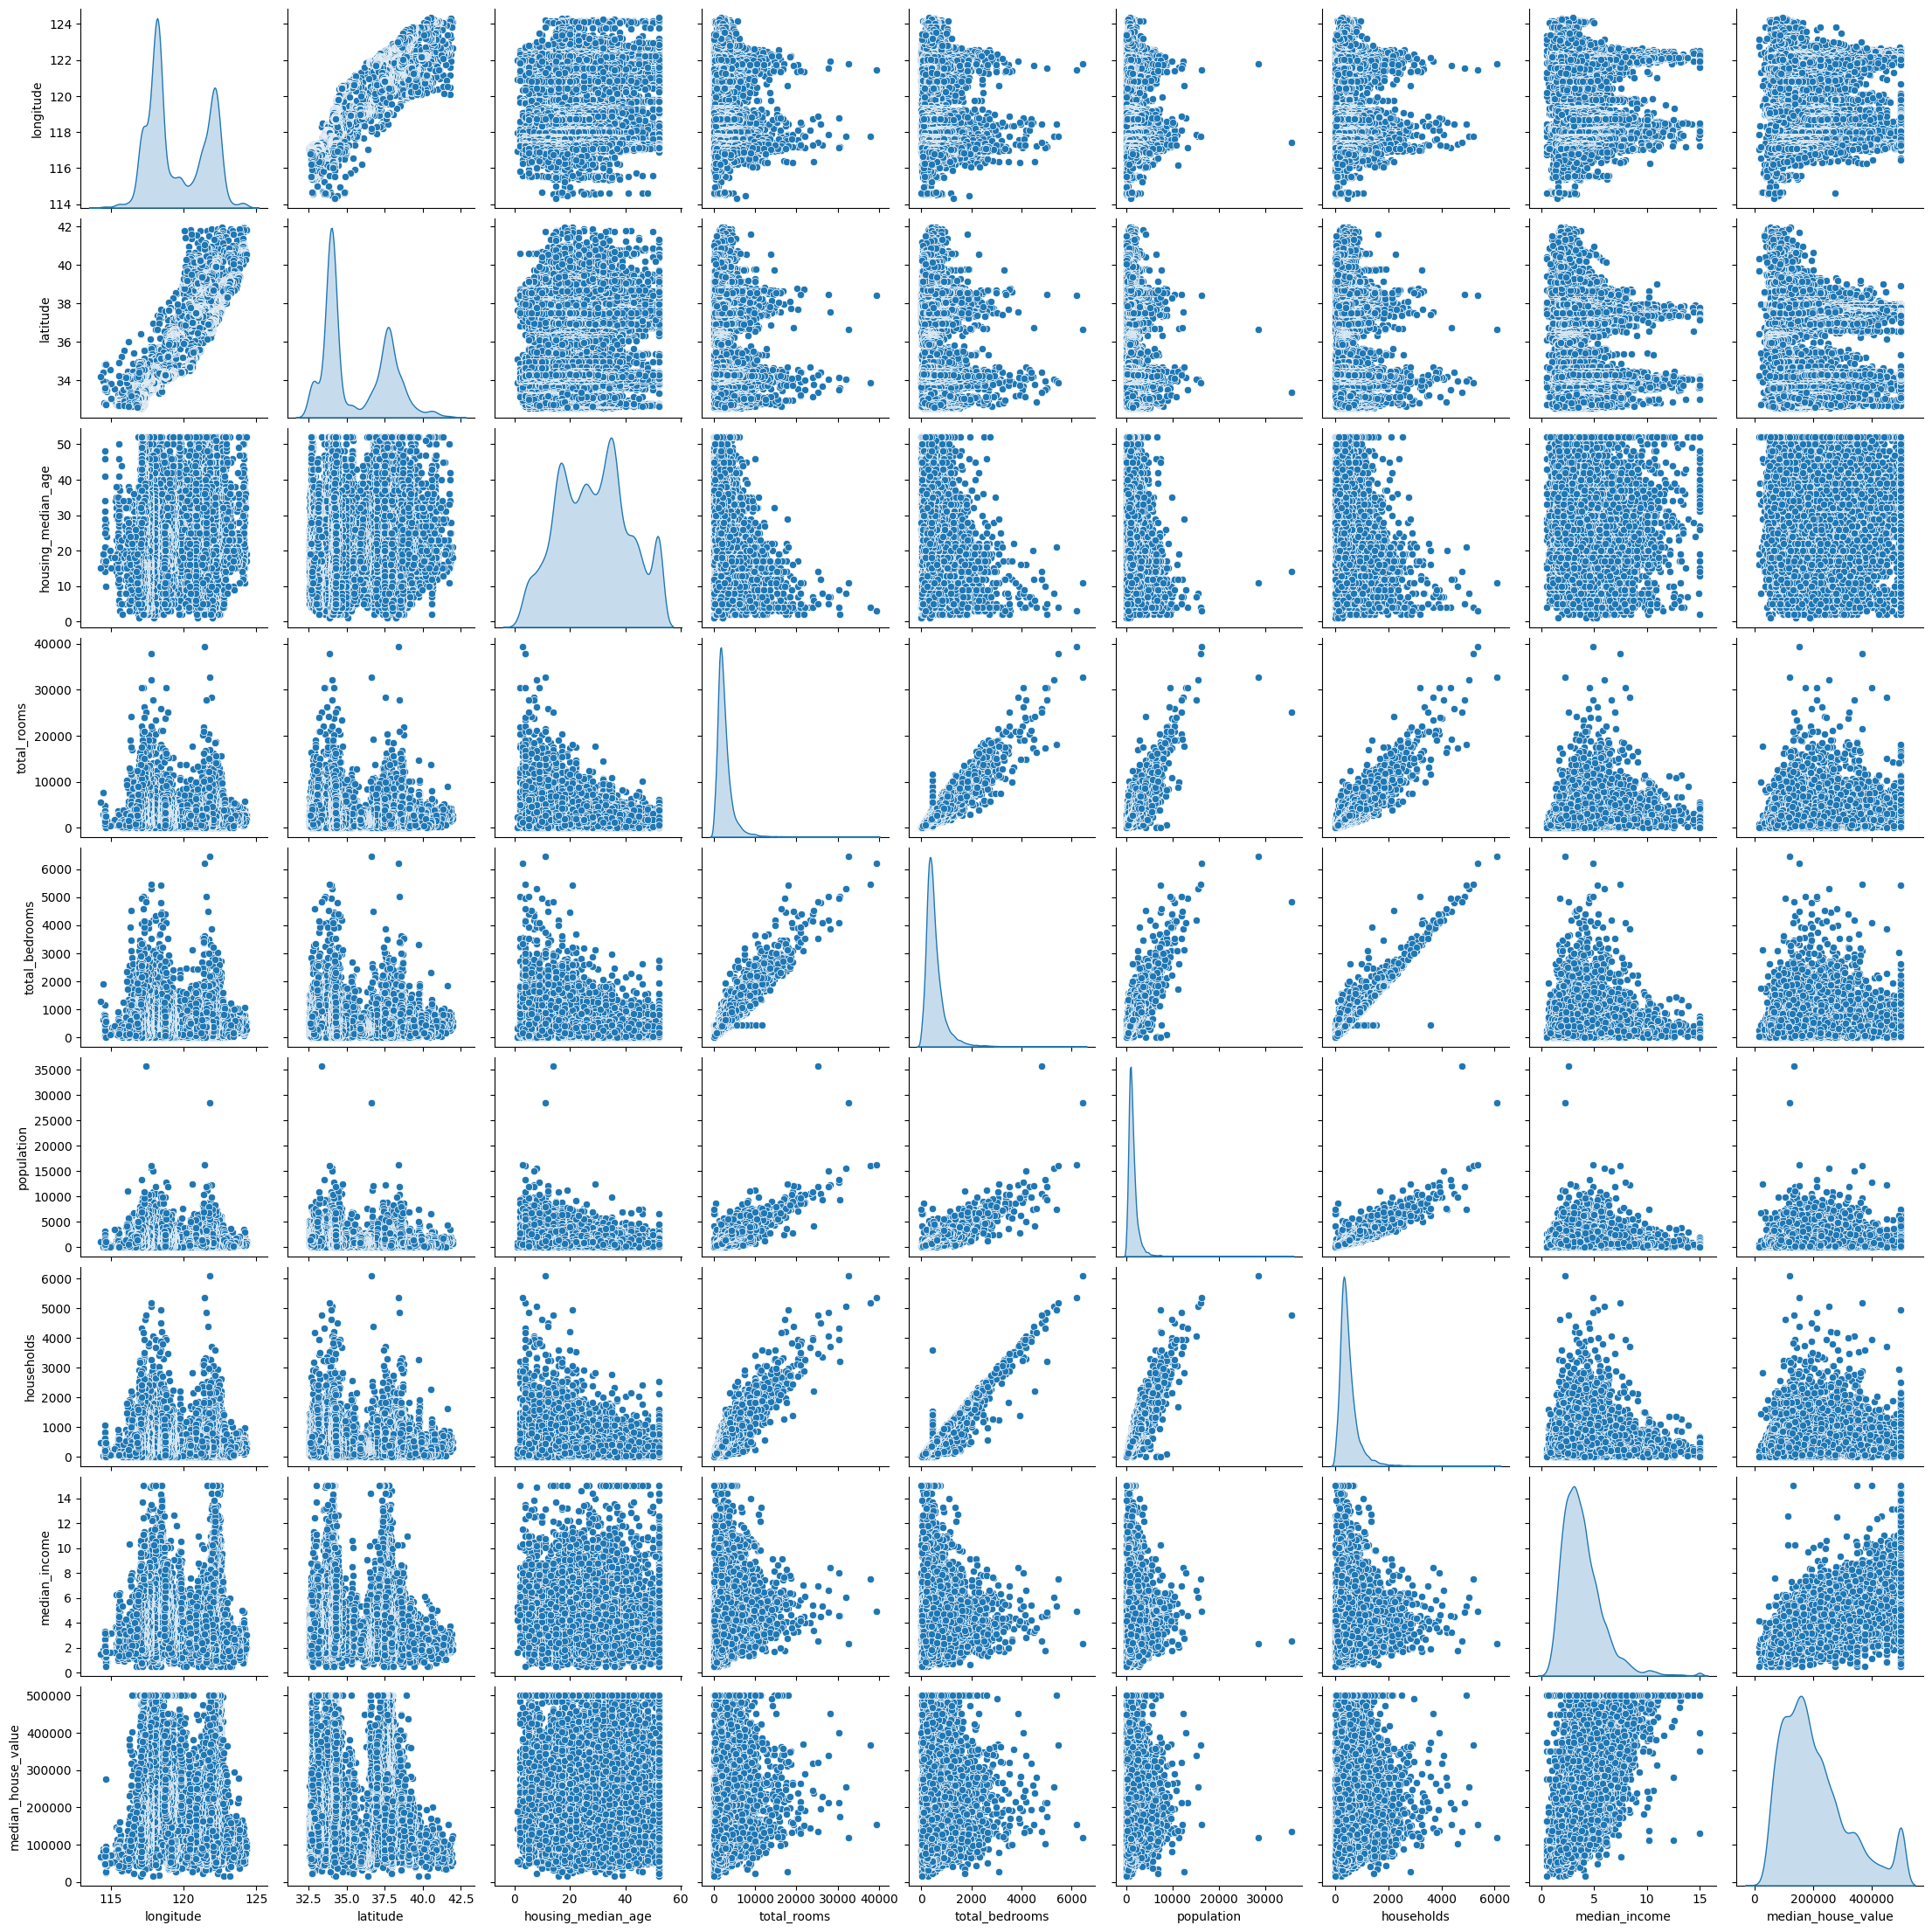

In [34]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [39]:
df.to_csv('housing_edit.csv', index=False)